#Lab-3

Build Logistic Regression Model for a given dataset

In [8]:
from google.colab import files
uploaded=files.upload()

Saving zoo-class-type.csv to zoo-class-type.csv


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy of the Multinomial Logistic Regression model on the test set: 1.00


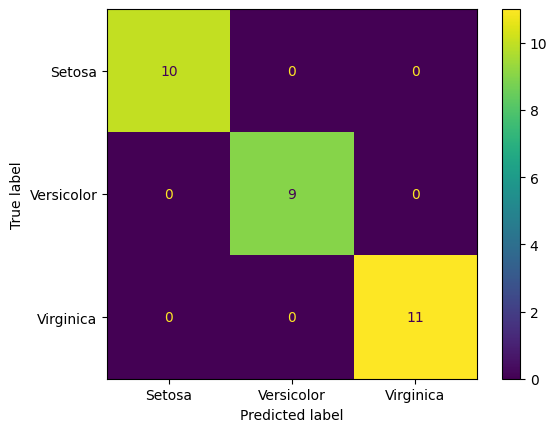

In [3]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the Iris dataset
iris =  pd.read_csv("iris (3).csv")
iris.head()

X=iris.drop('species',axis='columns')# Features (sepal length, sepal width, petal length, petal width)
y = iris.species # Target labels (0: Setosa, 1: Versicolor, 2: Virginica)

# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Multinomial Logistic Regression model
# Use 'multinomial' for multi-class classification and 'lbfgs' solver
model = LogisticRegression(multi_class='multinomial')

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print(f"Accuracy of the Multinomial Logistic Regression model on the test set: {accuracy:.2f}")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Setosa", "Versicolor", "Virginica"])

cm_display.plot()
plt.show()

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

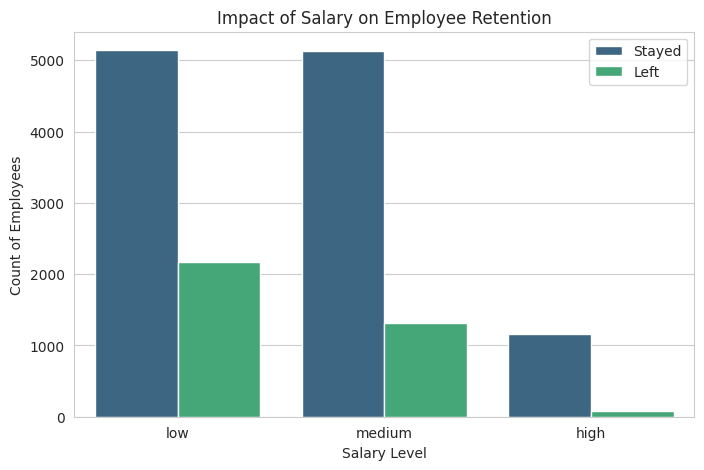

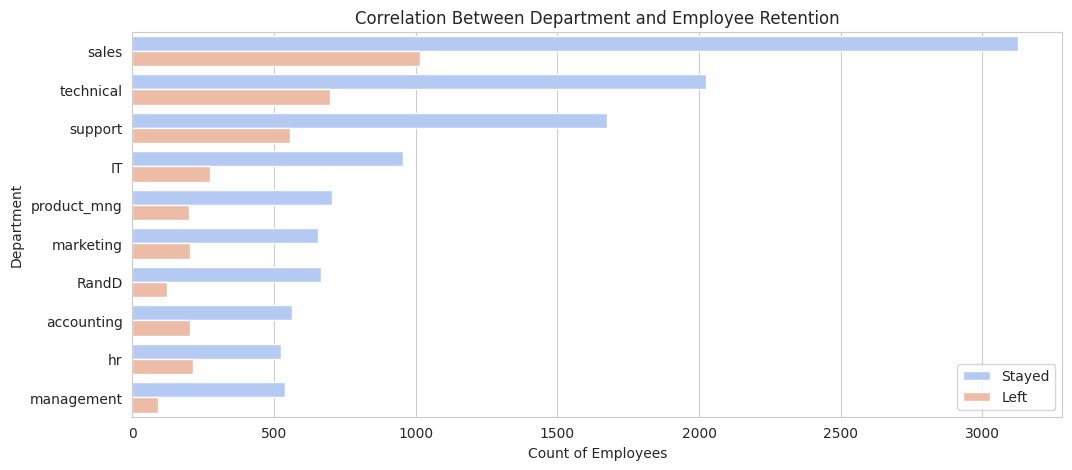

Model Accuracy: 0.7577
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      2294
           1       0.47      0.23      0.31       706

    accuracy                           0.76      3000
   macro avg       0.63      0.57      0.58      3000
weighted avg       0.72      0.76      0.72      3000



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv("HR_comma_sep.csv")
print(df.head())

missing_values = df.isnull().sum()
# Display columns with missing values
print(missing_values[missing_values > 0])

# Set seaborn style
sns.set_style("whitegrid")

# Plot bar chart for salary vs retention
plt.figure(figsize=(8, 5))
sns.countplot(x="salary", hue="left", data=df, palette="viridis")
plt.xlabel("Salary Level")
plt.ylabel("Count of Employees")
plt.title("Impact of Salary on Employee Retention")
plt.legend(["Stayed", "Left"])
plt.show()

# Plot bar chart for department vs retention
plt.figure(figsize=(12, 5))
sns.countplot(y="Department", hue="left", data=df, palette="coolwarm", order=df["Department"].value_counts().index)
plt.xlabel("Count of Employees")
plt.ylabel("Department")
plt.title("Correlation Between Department and Employee Retention")
plt.legend(["Stayed", "Left"])
plt.show()

# Encode categorical variables
label_encoders = {}
for col in ["salary", "Department"]:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Select relevant features
features = ["satisfaction_level", "last_evaluation", "number_project", "average_montly_hours",
            "time_spend_company", "Work_accident", "promotion_last_5years", "salary", "Department"]
X = df[features]
y = df["left"]

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict on test set
y_pred = log_reg.predict(X_test)

# Measure accuracy
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print results
print(f"Model Accuracy: {accuracy:.4f}")
print("Classification Report:")
print(classification_rep)

To Do: Implementation – Logistic Regression
(Binary Classification)

Write Python code to implement the following. Consider dataset file as “HR_comma_sep.csv”

Do some exploratory data analysis to figure out which variables have direct and clear
impact on employee retention (i.e. whether they leave the company or continue to work)

Plot bar charts showing impact of employee salaries on retention

Plot bar charts showing corelation between department and employee retention

Build logistic regression model using variables that were narrowed down in step 1

Measure the accuracy of the model

   satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years Department  \
0                   3              0     1                      0      sales   
1                   6              0     1                      0      sales   
2                   4              0     1                      0      sales   
3                   5              0     1                      0      sales   
4                   3              0     1                      0      sales   

   salary  
0     low  
1  medium  
2 

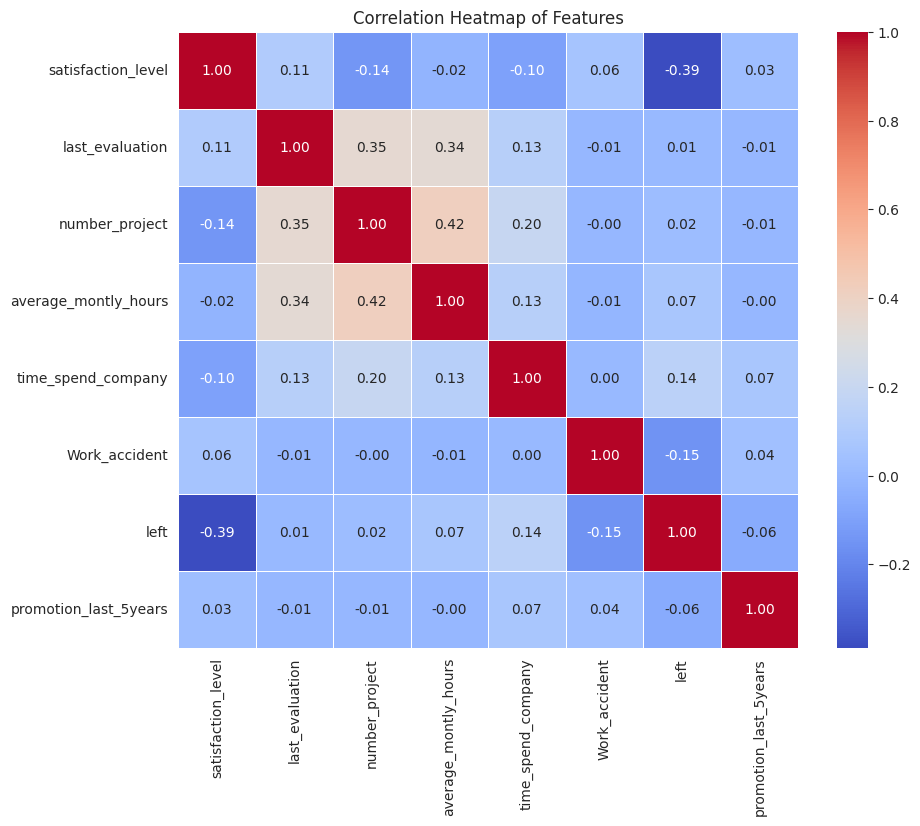

<Figure size 800x600 with 0 Axes>

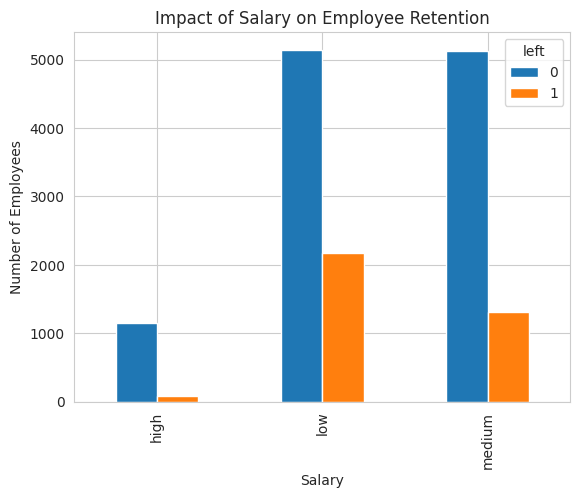

<Figure size 1000x600 with 0 Axes>

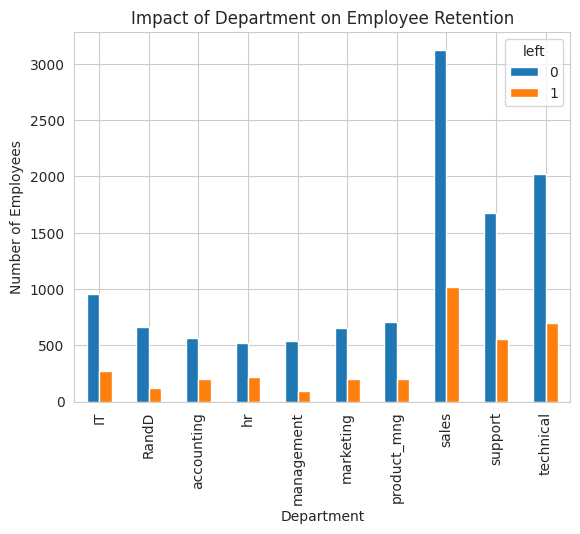


Accuracy of the model: 0.7986666666666666 



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv("HR_comma_sep.csv")
print(df.head())

# Correlation Heatmap (Before any transformation)
numerical_features = df.select_dtypes(include=['number']).columns

# Compute the correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Create a bar chart showing the impact of employee salaries on retention
plt.figure(figsize=(8, 6))
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title('Impact of Salary on Employee Retention')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.show()

# Create a bar chart showing the correlation between department and employee retention
plt.figure(figsize=(10, 6))
pd.crosstab(df.Department, df.left).plot(kind='bar')
plt.title('Impact of Department on Employee Retention')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

# Convert categorical features into numerical using one-hot encoding
df = pd.get_dummies(df, columns=['salary', 'Department'], drop_first=True)

# Define features (X) and target variable (y)
X = df.drop(['left'], axis=1)
y = df['left']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy of the model:", accuracy, "\n")

To Do: Implementation – Logistic Regression
(Multiclass Classification)

Write Python code to implement the following. Consider dataset file “zoo-data.csv” to predi . Details
of class type is provided in “zoo-class_type .csv”

If require apply necessary data preprocessing.

Build logistic regression model to predict “class_type”

Measure the accuracy of the model

Plot the confusion matrix

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00         8
        Bird       1.00      1.00      1.00         4
     Reptile       1.00      1.00      1.00         1
        Fish       1.00      1.00      1.00         3
   Amphibian       1.00      1.00      1.00         1
         Bug       1.00      1.00      1.00         2
Invertebrate       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



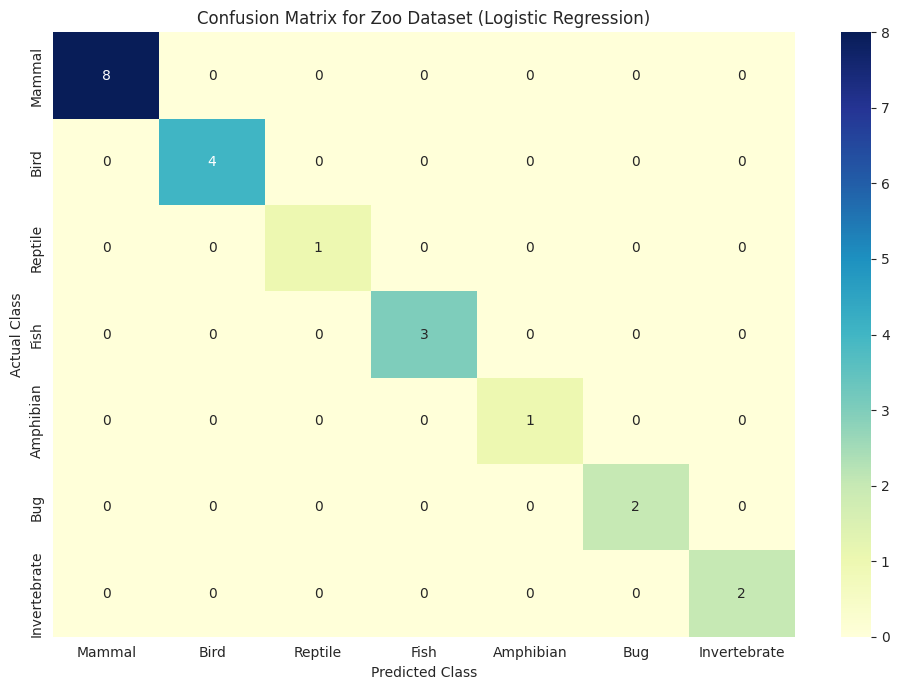

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load datasets
df_zoo = pd.read_csv("zoo-data.csv")
df_class = pd.read_csv("zoo-class-type.csv")

# Drop 'animal_name' as it's not needed for prediction
df_zoo = df_zoo.drop(columns=["animal_name"])

# Prepare features and target
X = df_zoo.drop(columns=["class_type"])
y = df_zoo["class_type"]

# Map class numbers to class names for later use in confusion matrix
class_map = df_class.set_index("Class_Number")["Class_Type"].to_dict()
class_labels = [class_map[i] for i in sorted(class_map.keys())]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(multi_class="multinomial", max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=class_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix with class names
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix for Zoo Dataset (Logistic Regression)")
plt.tight_layout()
plt.show()
